# Zukunftstag 2023

Jitao David Zhang, November 2023

Wir lernen gemeinsam Jupyter Lab kennen mit eine simulierte klinische Studie. Wir werden die Daten mit Jupyter Notebook analysieren und visualisieren, und die Daten gemeinsam interpretieren.

## Test that the notebook works

In [1]:
3 + 9

12

In [2]:
9/3

3.0

In [3]:
my_name = "David"
welcome = "Hello, " + my_name
print(welcome)

Hello, David


In [4]:
import numpy as np

In [5]:
my_numbers = range(1, 10)
np.sum(my_numbers)

45

In [6]:
my_numbers_2 = range(1, 100)
np.sum(my_numbers_2)

4950

# Simulate the study

In [7]:
import pandas as pd

In [8]:
np.random.seed(1887)

In [9]:
names = ["Emma", "Olivia", "Emily", "James", "Daniel",
         "Benjamin", "Michael", "Alexander", "Jacob", "Samuel",
         "Isabella", "Thomas", "Sarah", "Ava", "Charlotte", "Elizabeth",
         "Liam", "Mia", "Ethan", "Ella", "Sophia", "Joshua", "Oliver", "Grace",
         "Anna", "Lena", "Sophia", "Laila", "Emma", "Karl"]
len(names)

30

In [10]:
pre_g0 = np.random.normal(8, 1.5, size=10)
post_g0 = np.random.normal(8, 1.5, size=10)
pre_g1 = np.random.normal(8, 1.5, size=10)
post_g1 = np.random.normal(7, 1.5, size=10)
pre_g2 = np.random.normal(8, 1.5, size=10)
post_g2 = np.random.normal(5, 1.5, size=10)
pre_all = np.clip(np.concatenate((pre_g0, pre_g1, pre_g2), axis=None), 0, 10)
post_all = np.clip(np.concatenate((post_g0, post_g1, post_g2), axis=None), 0, 10)

In [11]:
treatments = np.concatenate((["PilleA"] * 10, ["PilleB"] * 10, ["PilleC"] * 10), axis=None)

In [12]:
trial_data = pd.DataFrame({"Name":names,
                          "Behandlung": treatments,
                          "Vor": pre_all,
                          "Nach": post_all},
                         index=names)

In [13]:
print(trial_data)

                Name Behandlung        Vor       Nach
Emma            Emma     PilleA   8.347596   7.951819
Olivia        Olivia     PilleA   8.602152   6.491120
Emily          Emily     PilleA   8.476754   6.688489
James          James     PilleA  10.000000   6.074195
Daniel        Daniel     PilleA   7.734438   7.085100
Benjamin    Benjamin     PilleA   6.408309   6.973887
Michael      Michael     PilleA  10.000000   8.972929
Alexander  Alexander     PilleA   7.402984   7.780026
Jacob          Jacob     PilleA   5.666638   8.915180
Samuel        Samuel     PilleA   5.966815  10.000000
Isabella    Isabella     PilleB   9.353107   5.581717
Thomas        Thomas     PilleB   8.870751   8.009993
Sarah          Sarah     PilleB   9.329035   8.967734
Ava              Ava     PilleB   9.430377   8.120269
Charlotte  Charlotte     PilleB   6.653851   7.691863
Elizabeth  Elizabeth     PilleB   7.416059   5.011575
Liam            Liam     PilleB   8.001598   5.179692
Mia              Mia     Pil

In [14]:
trial_data.sort_values(by=["Behandlung", "Name"])

,Name,Behandlung,Vor,Nach
Alexander,Alexander,PilleA,7.402984,7.780026
Benjamin,Benjamin,PilleA,6.408309,6.973887
Daniel,Daniel,PilleA,7.734438,7.085100
Emily,Emily,PilleA,8.476754,6.688489
Emma,Emma,PilleA,8.347596,7.951819
Jacob,Jacob,PilleA,5.666638,8.915180
James,James,PilleA,10.000000,6.074195
Michael,Michael,PilleA,10.000000,8.972929
Olivia,Olivia,PilleA,8.602152,6.491120
Samuel,Samuel,PilleA,5.966815,10.000000


In [15]:
import matplotlib.style as style
import matplotlib.pyplot as plt
style.use("fast")

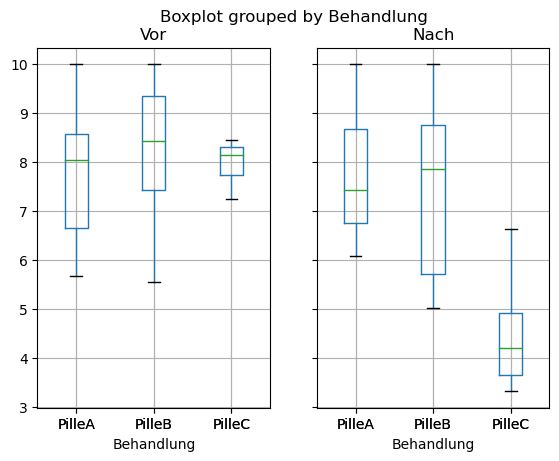

In [16]:
trial_data.boxplot(column=["Vor", "Nach"], by="Behandlung")
plt.show()

In [17]:
trial_data["Unterschied"] = trial_data["Nach"] - trial_data["Vor"]
print(trial_data)

                Name Behandlung        Vor       Nach  Unterschied
Emma            Emma     PilleA   8.347596   7.951819    -0.395777
Olivia        Olivia     PilleA   8.602152   6.491120    -2.111032
Emily          Emily     PilleA   8.476754   6.688489    -1.788265
James          James     PilleA  10.000000   6.074195    -3.925805
Daniel        Daniel     PilleA   7.734438   7.085100    -0.649338
Benjamin    Benjamin     PilleA   6.408309   6.973887     0.565578
Michael      Michael     PilleA  10.000000   8.972929    -1.027071
Alexander  Alexander     PilleA   7.402984   7.780026     0.377042
Jacob          Jacob     PilleA   5.666638   8.915180     3.248542
Samuel        Samuel     PilleA   5.966815  10.000000     4.033185
Isabella    Isabella     PilleB   9.353107   5.581717    -3.771389
Thomas        Thomas     PilleB   8.870751   8.009993    -0.860758
Sarah          Sarah     PilleB   9.329035   8.967734    -0.361300
Ava              Ava     PilleB   9.430377   8.120269    -1.31

In [18]:
trial_data.sort_values("Unterschied", ascending=False)

,Name,Behandlung,Vor,Nach,Unterschied
Samuel,Samuel,PilleA,5.966815,10.000000,4.033185
Ella,Ella,PilleB,5.550307,8.957143,3.406836
Jacob,Jacob,PilleA,5.666638,8.915180,3.248542
Ethan,Ethan,PilleB,7.486437,10.000000,2.513563
Charlotte,Charlotte,PilleB,6.653851,7.691863,1.038011
Benjamin,Benjamin,PilleA,6.408309,6.973887,0.565578
Alexander,Alexander,PilleA,7.402984,7.780026,0.377042
Sarah,Sarah,PilleB,9.329035,8.967734,-0.361300
Emma,Emma,PilleA,8.347596,7.951819,-0.395777
Daniel,Daniel,PilleA,7.734438,7.085100,-0.649338


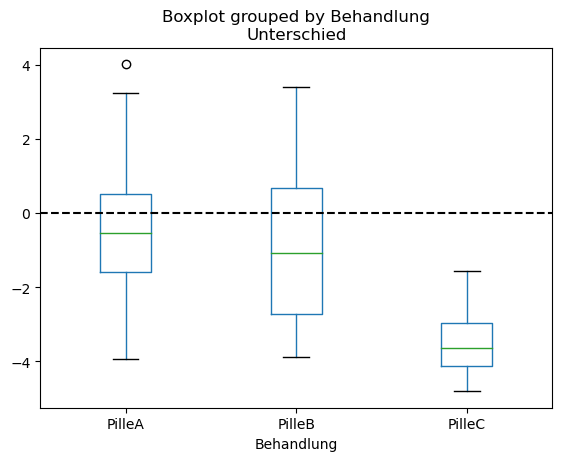

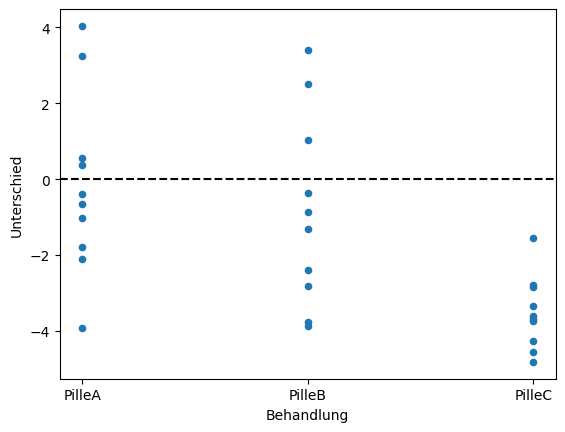

In [19]:
trial_data.boxplot(column="Unterschied", by="Behandlung", grid=False)
plt.axhline(y=0, color="k", linestyle="--")
trial_data.plot.scatter("Behandlung", "Unterschied")
plt.axhline(y=0, color="k", linestyle="--")
plt.show()

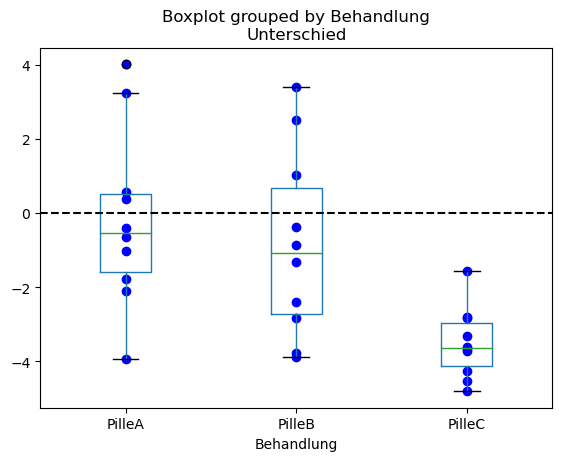

In [20]:
p = trial_data.boxplot(column="Unterschied", by="Behandlung", grid=False)
plt.axhline(y=0, color="k", linestyle="--")
for b, d in enumerate(trial_data["Unterschied"]):
    behandlung = trial_data["Behandlung"][b]
    if behandlung == "PilleA":
        x = 1
    elif behandlung == "PilleB":
        x = 2
    elif behandlung == "PilleC":
        x = 3
    plt.scatter(x, d, c="blue")
plt.show()

In [21]:
## density plot is not supported by Jupyter
## trial_pivot = trial_data.reset_index().pivot(columns="Behandlung", values="Unterschied")
## trial_pivot.plot.density()
## plt.axvline(x=0, c="k", linestyle="--")
## plt.show()